# **Imports**

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, regularizers # type: ignore

import numpy as np

import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
tf.config.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## **Importing CIFAR Dataset**

In [ ]:
# This has 60,000 32x32 color images with 10 classes and 6000 images for each class.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


### **Normalizing Data**

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
train_images.shape

(50000, 32, 32, 3)

## **Class Names**

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## **Show Image**

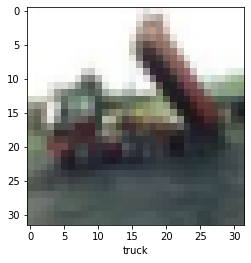

In [ ]:
img_selector = 2

plt.imshow(train_images[img_selector], cmap= plt.cm.binary)

plt.xlabel(class_names[train_labels[img_selector][0]])

plt.show()

# **Building Model**

In [ ]:
model = models.Sequential()

## **Convoluted Layers**

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (32, 32, 3)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding= 'same', kernel_regularizer= regularizers.l2(0.01), activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding= 'same', kernel_regularizer= regularizers.l2(0.01), activation= 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

## **Dense Layers**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.01)))
model.add(layers.Dense(32, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)))
model.add(layers.Dense(10, activation= 'relu'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 200)               205000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
=================================================================
Total params: 286,980
Trainable params: 286,980
Non-trainable params: 0
_________________________________________________________________

# **Compile Model**

In [ ]:
model.compile(  optimizer= 'adam',
                loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
                metrics= ['accuracy'])

history = model.fit(train_images, train_labels, batch_size=2000, epochs=200, validation_data=(test_images, test_labels), verbose = 1)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 12s 123ms/step - loss: 5.9115 - accuracy: 0.2353 - val_loss: 5.0724 - val_accuracy: 0.2862
Epoch 2/200
25/25 [==============================] - 2s 89ms/step - loss: 3.9031 - accuracy: 0.3894 - val_loss: 3.9407 - val_accuracy: 0.3327
Epoch 3/200
25/25 [==============================] - 2s 90ms/step - loss: 2.9089 - accuracy: 0.4692 - val_loss: 3.4084 - val_accuracy: 0.3003
Epoch 4/200
25/25 [==============================] - 2s 90ms/step - loss: 2.3920 - accuracy: 0.5254 - val_loss: 3.1349 - val_accuracy: 0.2451
Epoch 5/200
25/25 [==============================] - 2s 90ms/step - loss: 2.0821 - accuracy: 0.5639 - val_loss: 2.9697 - val_accuracy: 0.2018
Epoch 6/200
25/25 [==============================] - 2s 90ms/step - loss: 1.8634 - accuracy: 0.5962 - val_loss: 2.8594 - val_accuracy: 0.2369
Epoch 7/200
25/25 [==============================] - 2s 90ms/step - loss: 1.7172 - accuracy: 0.6204 - val_loss: 2.7782 - val_accuracy: 0.2616
Epoch 8/200
25/2


Epoch 50/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0716 - accuracy: 0.9769 - val_loss: 2.3869 - val_accuracy: 0.6806

In [ ]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'Train Loss: {train_loss:.2f} | Train Acc: {train_acc:.2f}')
print(f'Val Loss: {test_loss:.2f} | Val Acc: {test_acc:.2f}')

1563/1563 - 4s - loss: 1.9364 - accuracy: 0.4849 - 4s/epoch - 3ms/step
313/313 - 1s - loss: 2.0323 - accuracy: 0.4734 - 758ms/epoch - 2ms/step
Train Loss: 1.94 | Train Acc: 0.48
Val Loss: 2.03 | Val Acc: 0.47


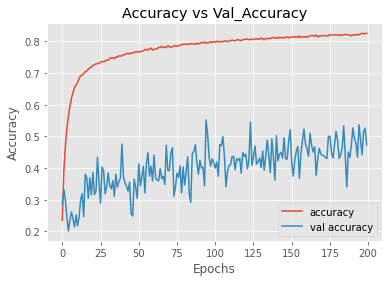

In [ ]:
#@title
plt.style.use('ggplot')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

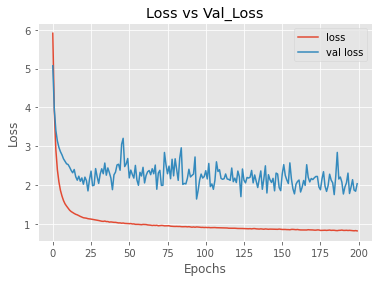

In [ ]:
#@title
plt.style.use('ggplot')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Data Augmentation**

datagen = ImageDataGenerator(
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

augmented_history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs= 10, validation_data=(test_images, test_labels), verbose=1)

In [ ]:
datagen = ImageDataGenerator( rotation_range= 40, 
                              width_shift_range= 0.2, 
                              height_shift_range= 0.2, 
                              shear_range= 0.2, 
                              zoom_range= 0.2,
                              horizontal_flip= True,
                              fill_mode= 'nearest' )

datagen.fit(train_images)

train_images_augmented = np.copy(train_images)
print(train_images_augmented.shape)
train_labels_augmented = np.copy(train_labels)

for X_train, X_labels in datagen.flow(train_images, train_labels, batch_size=50000):
  train_images_augmented = np.append(train_images_augmented, X_train, axis=0)
  print(X_train.shape, train_images_augmented.shape)
  train_labels_augmented = np.append(train_labels_augmented, X_labels, axis=0)
  break


(50000, 32, 32, 3)
(50000, 32, 32, 3) (100000, 32, 32, 3)


augmented_history = model.fit(datagen.flow(train_images, train_labels, batch_size=1000), epochs= 100, validation_data=(test_images, test_labels), verbose=1)

In [ ]:
history_augmented = model.fit(train_images_augmented, train_labels_augmented, batch_size=2000, epochs=200, validation_data=(test_images, test_labels), verbose = 1)

Epoch 1/200
50/50 [==============================] - 5s 93ms/step - loss: 1.2642 - accuracy: 0.6685 - val_loss: 2.1691 - val_accuracy: 0.4079
Epoch 2/200
50/50 [==============================] - 4s 88ms/step - loss: 1.1882 - accuracy: 0.6860 - val_loss: 2.4080 - val_accuracy: 0.3648
Epoch 3/200
50/50 [==============================] - 4s 88ms/step - loss: 1.1688 - accuracy: 0.6910 - val_loss: 2.4818 - val_accuracy: 0.3299
Epoch 4/200
50/50 [==============================] - 4s 89ms/step - loss: 1.1580 - accuracy: 0.6931 - val_loss: 2.1844 - val_accuracy: 0.3895
Epoch 5/200
50/50 [==============================] - 5s 90ms/step - loss: 1.1484 - accuracy: 0.6968 - val_loss: 1.8700 - val_accuracy: 0.4731
Epoch 6/200
50/50 [==============================] - 4s 88ms/step - loss: 1.1472 - accuracy: 0.6971 - val_loss: 2.2490 - val_accuracy: 0.3760
Epoch 7/200
50/50 [==============================] - 5s 91ms/step - loss: 1.1444 - accuracy: 0.6978 - val_loss: 1.7357 - val_accuracy: 0.4958
Epoch 

In [ ]:
train_augmented_loss, train_augmented_acc = model.evaluate(train_images_augmented, train_labels_augmented, verbose=2)
test_augmented_loss, test_augmented_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'Train Loss: {train_augmented_loss:.2f} | Train Acc: {train_augmented_acc:.2f}')
print(f'Val Loss: {test_augmented_loss:.2f} | Val Acc: {test_augmented_acc:.2f}')

3125/3125 - 8s - loss: 1.8504 - accuracy: 0.4884 - 8s/epoch - 3ms/step
313/313 - 1s - loss: 1.5130 - accuracy: 0.5805 - 791ms/epoch - 3ms/step
Train Loss: 1.85 | Train Acc: 0.49
Val Loss: 1.51 | Val Acc: 0.58


In [ ]:
plt.style.use('ggplot')
plt.plot(history_augmented.history['accuracy'], label = 'accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

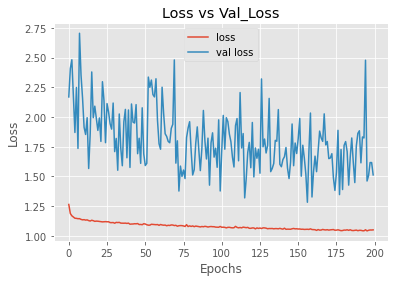

In [ ]:
plt.style.use('ggplot')
plt.plot(history_augmented.history['loss'], label = 'loss')
plt.plot(history_augmented.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Making Predictions**

In [ ]:
predictions = model.predict(test_images)

img_selector = 10000

plt.imshow(test_images[img_selector], cmap= plt.cm.binary)
plt.title('Expected: '+ class_names[test_labels[img_selector][0]])
plt.xlabel('Predicted: '+ class_names[np.argmax(predictions[img_selector])])

plt.show()

NameError: ignored

In [ ]:
!nvidia-smi